In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NH3y1',
       'COy1','BPy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NOxy2', 'NH3y2',
       'COy2','BPy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NH3y3', 'COy3','BPy3',
        'ATy3','year', 'month', 'day']]
Y1 = df['NOx']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=3)

In [18]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=8,
                                      max_features=0.47,
                                      min_samples_split=5,
                                      min_samples_leaf=6,
                                      learning_rate=0.002)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.002, max_depth=8, max_features=0.47,
                          min_samples_leaf=6, min_samples_split=5,
                          n_estimators=2500)

In [19]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9715666459143455

Score on test data: 0.7170855191056918

Root Mean Squared Error: 39.235761535416174

Overall model accuracy: 0.7170855191056918


In [20]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NH3y1',
       'COy1','BPy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NOxy2', 'NH3y2',
       'COy2','BPy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NH3y3', 'COy3','BPy3',
        'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NH3y1,COy1,BPy1,ATy1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NH3y3,COy3,BPy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,32.607143,2.175714,992.431429,8.394286,217.428571,371.975714,...,416.398571,100.627143,83.730000,56.007143,2.998571,734.987143,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,29.011429,1.537714,991.651429,8.800000,264.292857,452.655714,...,332.717143,98.832857,67.225714,57.234286,3.004286,735.531429,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,31.015714,0.970000,990.642857,11.971429,191.864286,344.172857,...,282.434286,101.944286,57.842857,48.108571,2.867143,735.414286,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,28.408571,1.768000,991.448571,9.905714,237.660000,405.398571,...,346.604286,94.412857,75.028571,43.388571,2.740000,732.054286,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,23.565714,2.566000,993.708571,10.632857,173.172857,302.185714,...,237.858571,49.015714,68.434286,44.487143,1.844286,727.997143,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,23.558571,2.305429,990.021429,9.834286,143.550000,284.925714,...,251.350000,74.012857,62.091429,42.347143,2.127143,727.672857,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,22.507143,1.334286,995.670000,11.920000,193.068571,331.052857,...,328.171429,153.021429,66.960000,39.584286,2.754286,735.524286,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,27.225714,1.971429,991.444286,13.324286,109.957143,204.577143,...,279.338571,50.672857,67.874286,30.340000,1.890000,735.264286,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,27.742857,1.424286,994.125714,15.858571,166.732857,330.682857,...,275.608571,34.234286,82.401429,37.265714,1.715714,732.928571,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,27.334286,1.810714,991.534286,12.517143,109.975714,228.510000,...,280.377143,38.925714,62.438571,26.370000,1.704286,726.498571,17.097143,2020,3,1


In [21]:
predict=grad_boost.predict(X)

In [22]:
predict

array([ 41.06312895, 126.32872516,  80.71309283, 103.42881033,
        85.21658121,  96.81521038, 110.97849364,  73.48637091,
        80.39717315,  83.29486503,  82.98995725,  88.86544531,
        81.91846579,  95.09972003,  81.59957631,  71.82323664,
        80.23173365,  96.60366176,  66.79675939,  91.13444288,
        74.7799993 ,  92.42995745,  58.1749966 ,  41.38285505,
        55.86592974,  40.18989359,  43.17594046,  43.37154353,
        49.78086478,  33.49942857,  34.93443113,  39.71874381,
        33.88986807,  31.77957514,  33.89343444,  38.2974492 ,
        41.84244356,  40.69721272,  37.5701547 ,  91.37089695,
       103.94252479, 103.55315288, 101.2227371 , 119.77235913,
        90.84799656, 150.75600812,  93.21053682,  85.6771619 ,
        83.02846606, 124.52732475,  97.90541621, 144.17586117,
       170.15052084])

In [23]:
dates=data.loc['207':'259','From Date']

In [24]:
X['From Date']=dates.values

In [25]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NH3y1', 'COy1', 'BPy1', 'ATy1',
       'PM2.5y2', 'PM1y2', 'NOy2', 'NOxy2', 'NH3y2', 'COy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NH3y3', 'COy3', 'BPy3', 'ATy3',
       'year', 'month', 'day', 'From Date'],
      dtype='object')

In [26]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [27]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [28]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [29]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

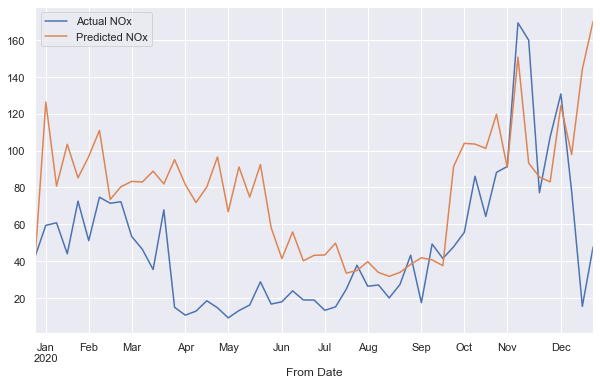

In [30]:
test['NOx'].plot(legend=True, label='Actual NOx', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NOx')

In [66]:
np.sqrt(mean_squared_error(test['NOx'],X['pred']))

55.86834879069881

In [31]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 31.549384773025956
MSE: 1539.4449832640432
RMSE: 39.235761535416174
R-Squared: 0.7170855191056918


In [32]:
mae = metrics.mean_absolute_error(test['NOx'],X['pred'])
mse = metrics.mean_squared_error(test['NOx'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NOx'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 35.28739898592527
MSE: 2105.556080659976
RMSE: 45.88633871491575
R-Squared: -0.6154686010472732


In [33]:
import pickle
filename = 'NOx_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [34]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7170855191056918


# 3rd plot

In [35]:
testcase = pd.DataFrame()

In [36]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [37]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [38]:
testcase

,test,pred,Corrected
174,91.712857,90.569585,129.805346
173,79.605714,85.295488,46.059726
118,71.315714,88.335551,49.099789
190,30.197143,20.979836,60.215598
162,98.288571,91.142187,130.377949
70,122.740000,139.105994,99.870233
159,52.171429,108.642953,69.407191
156,117.267143,166.259534,127.023773
25,52.015714,66.780559,27.544797
71,55.952857,98.614377,59.378615


In [39]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [40]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8796905731389314

In [41]:
test2020=pd.DataFrame()

In [42]:
test2020['test']=test['NOx']
test2020['pred']=X['pred']

In [43]:
test2020.index=test.index

In [44]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

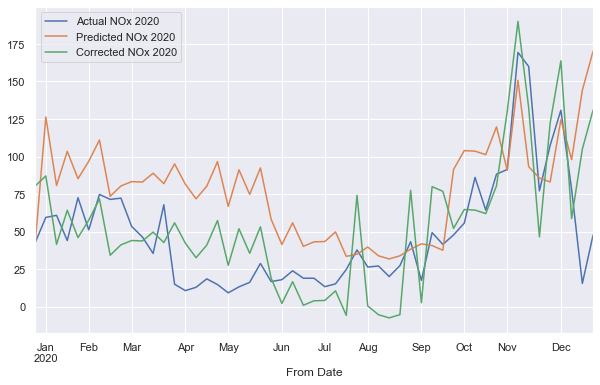

In [45]:
test2020['test'].plot(legend=True, label='Actual NOx 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NOx 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NOx 2020')

In [46]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5308121901416234